In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
pd.options.display.max_seq_items = 2000
pd.options.display.max_columns = 500
pd.options.display.max_rows = 800
pd.options.display.max_colwidth = 200
pd.options.display.width = 800

In [69]:
os.getcwd()

'/Users/francesco/REPOS/nam-nat-CNN-clf/app'

In [70]:
base_url = '/Users/francesco/REPOS/nam-nat-CNN-clf/app'

In [71]:
os.chdir(base_url)

In [72]:
from src.utils.dev_utils import load_raw_data 

In [73]:
filepath = os.path.join(base_url, "data", "names-by-nationality.csv")
raw_data = load_raw_data(filepath)

csv loaded into dataframe of shape:  (4695, 3)


In [74]:
print(raw_data.shape)
raw_data.head()

(4695, 3)


,name,sex,nationality
0,Aarav,Male,Indian
1,Aaryan,Male,Indian
2,Abha,Female,Indian
3,Abhay,Male,Indian
4,Abhilash,Male,Indian


In [75]:
raw_data.rename(columns= {"sex": "gender"}, inplace=True)
raw_data.head()

,name,gender,nationality
0,Aarav,Male,Indian
1,Aaryan,Male,Indian
2,Abha,Female,Indian
3,Abhay,Male,Indian
4,Abhilash,Male,Indian


In [76]:
print(raw_data.isna().sum())

name           0
gender         0
nationality    0
dtype: int64


American    1782
Japanese     757
French       584
Indian       576
African      520
German       334
Russian      142
Name: nationality, dtype: int64


<AxesSubplot:ylabel='nationality'>

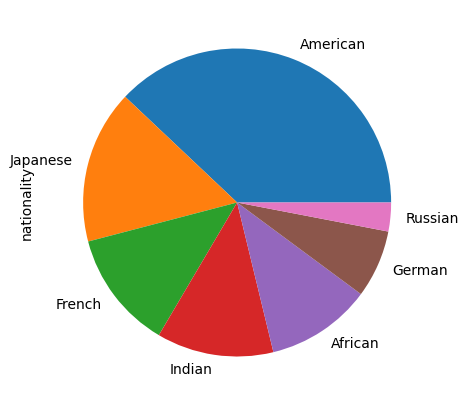

In [77]:
print(raw_data["nationality"].value_counts())
raw_data["nationality"].value_counts().plot(kind='pie', figsize=(5,5))

Female     2573
Male       1356
Neutral     766
Name: gender, dtype: int64


<AxesSubplot:ylabel='gender'>

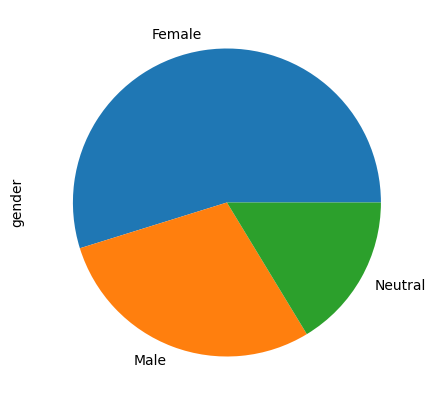

In [79]:
print(raw_data["gender"].value_counts())
raw_data["gender"].value_counts().plot(kind='pie', figsize=(5,5))

In [106]:
grouped = raw_data.groupby("nationality")
result = []
for gen, group in grouped:
    print(gen)
    #print(group["gender"].value_counts(sort=False))
    frame = group["gender"].value_counts(sort=False)
    print("frame = ", frame)
    print("---")
    result.append({
        "nationality": gen, 
        "Female" : group["gender"].value_counts().values[0],
        "Male" : group["gender"].value_counts().values[1],
        "Neutral" : group["gender"].value_counts().values[2],
        })
    #print(result)

result_df = pd.DataFrame(result)
result_df
    #print(gen)
    #print(group["gender"].value_counts())
    


African
frame =  Female     236
Male       190
Neutral     94
Name: gender, dtype: int64
---
American
frame =  Female     1118
Neutral     368
Male        296
Name: gender, dtype: int64
---
French
frame =  Female     328
Male       134
Neutral    122
Name: gender, dtype: int64
---
German
frame =  Female     120
Neutral     62
Male       152
Name: gender, dtype: int64
---
Indian
frame =  Male       211
Female     307
Neutral     58
Name: gender, dtype: int64
---
Japanese
frame =  Female     397
Male       310
Neutral     50
Name: gender, dtype: int64
---
Russian
frame =  Female     67
Male       63
Neutral    12
Name: gender, dtype: int64
---


,nationality,Female,Male,Neutral
0,African,236,190,94
1,American,1118,368,296
2,French,328,134,122
3,German,152,120,62
4,Indian,307,211,58
5,Japanese,397,310,50
6,Russian,67,63,12


<AxesSubplot:xlabel='nationality', ylabel='Count'>

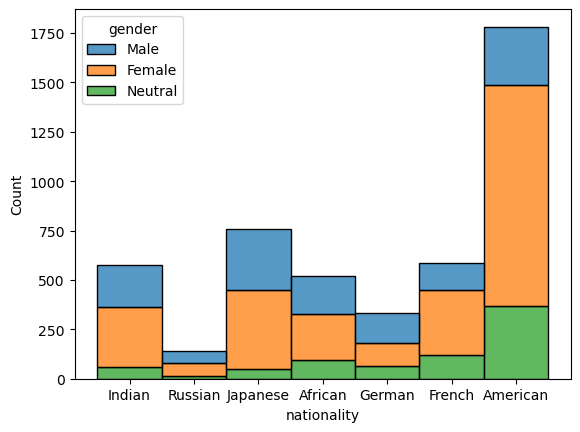

In [107]:
sns.histplot(data=raw_data, x="nationality", hue="gender", multiple="stack")